In [1]:
import numpy as np

from display import *
from grid import *
from path_finder import *

In [3]:

def order_31_12_31():
    x = -3

    # horizontal walls
    yield simple_wall((0,1/2), (1,0), 22)
    yield simple_wall((0,1 + 6/2), (1,0), 22)
    yield simple_wall((0,1 + 13/2), (1,0), 22)

    for _ in range(3):
        # top short
        x += 7
        yield simple_wall((x,0), (-1,1), 7/2)
        yield simple_wall((x - 7/2,7/2), (-1,-1), 3/2)
        yield simple_wall((x - 9/2,5/2), (1,-1), 1/2)

        # middle long
        yield simple_wall((x,1), (1,1), 12/2)
        yield simple_wall((x,1), (-1,1), 3/2)
        yield simple_wall((x + 12/2,
                            1 + 12/2), (1,-1), 3/2)
        yield simple_wall((x - 3 + 4/2,
                            1 + 2/2), (1,1), 1/2)
        yield simple_wall((x - 3 + 12/2 + 7/2,
                            1 + 12/2 - 3/2), (1,1), 1/2)

        # bottom short
        yield simple_wall((x - 1/2,15/2), (1,-1), 6/2)
        yield simple_wall((x + 5/2,9/2), (1,1), 3/2)
        yield simple_wall((x + 7/2,11/2), (-1,1), 1/2)


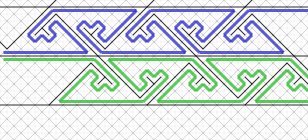

In [4]:
cols = 22
rows = 10
size = 14
display = Display(cols * size, rows * size)

test_pat = np.array(list(order_31_12_31())) * size

debug = np.array([
#    (204.5, 5.0, -8285.5, 8495.0)
])

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    width = 3
    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)
    pf = PathFind(np.array([0.25,3.75]) * size, (1,0), test_pat, size)
    for i in range(36):
        draw_simple_lines(context, list(pf.step()))

    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.75, 0.2, 0.8)
    pf = PathFind(np.array([0.25,4.25]) * size, (1,0), test_pat, size)
    for i in range(36):
        draw_simple_lines(context, list(pf.step()))
    
    context.set_source_rgba(0.8, 0.2, 0.2, 0.8)
    draw_simple_lines(context, debug)

display.show()

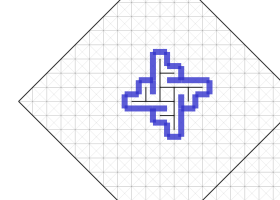

In [5]:
cols = 14
rows = 10
size = 20
display = Display(cols * size, rows * size)

def kells_simple_pat():
    c = np.array([5,4.5])

    # bounds!
    yield simple_wall((0,0), (1,0), 10)
    yield simple_wall((10,0), (0,1), 10)
    yield simple_wall((10,10), (-1,0), 10)
    yield simple_wall((0,10), (0,-1), 10)

    # primary spokes clockwise from 1:30
    yield simple_wall(c + np.array([-0.5,0]), (1,-1), 3/2)
    yield simple_wall(c + np.array([0,-0.5]), (1,1), 3/2)
    yield simple_wall(c + np.array([0.5,0]), (-1,1), 3/2)
    yield simple_wall(c + np.array([0,0.5]), (-1,-1), 3/2)

    yield simple_wall(c + np.array([0.5,-1]), (1,1), 0.5)
    yield simple_wall(c + np.array([1,0.5]), (-1,1), 0.5)
    yield simple_wall(c + np.array([-0.5,1]), (-1,-1), 0.5)
    yield simple_wall(c + np.array([-1,-0.5]), (1,-1), 0.5)


test_pat = np.array(list(kells_simple_pat())) * size


with display as context:
    context.translate(8 * size, -2 * size)
    context.rotate(45*math.pi/180)

    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    width = 6
    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)

    pf = PathFind(np.array([4.5,4]) * size, (1,-1), test_pat, size)
    for i in range(3):
        draw_simple_lines(context, list(pf.step()))

    pf = PathFind(np.array([5.5,4]) * size, (1,1), test_pat, size)
    for i in range(3):
        draw_simple_lines(context, list(pf.step()))

    pf = PathFind(np.array([5.5,5]) * size, (-1,1), test_pat, size)
    for i in range(3):
        draw_simple_lines(context, list(pf.step()))

    pf = PathFind(np.array([4.5,5]) * size, (-1,-1), test_pat, size)
    for i in range(3):
        draw_simple_lines(context, list(pf.step()))

    # tidying up
    draw_simple_lines(context, np.array([
        simple_wall(np.array([3,3.5]) * size, (1,1), 1 * size),
        simple_wall(np.array([6,2.5]) * size, (-1,1), 1 * size),
        simple_wall(np.array([7,5.5]) * size, (-1,-1), 1 * size),
        simple_wall(np.array([4,6.5]) * size, (1,-1), 1 * size)
    ]))

# - demonstrates inability to double back along single length
display.show()

In [6]:

def kells1(prongs_top=True):
    # border
    yield simple_wall(np.array([0.5,0.5]), (1,0), 7)
    yield simple_wall(np.array([0.5,0.5]), (0,1), 7)
    yield simple_wall(np.array([7.5,0.5]), (0,1), 7)
    yield simple_wall(np.array([0.5,7.5]), (1,0), 7)

    # top right
    yield simple_wall(np.array([7.5,0.5]), (-1,1), 3)
    yield simple_wall(np.array([3,2]), (1,1), 3)
    if prongs_top:
        yield simple_wall(np.array([6,4]), (-1,1), 0.5)
        yield simple_wall(np.array([4,2]), (-1,1), 0.5)

    # bottom left
    yield simple_wall(np.array([0.5,7.5]), (1,-1), 3)
    yield simple_wall(np.array([2,3]), (1,1), 3)

    if not prongs_top:
        yield simple_wall(np.array([4.5,5.5]), (-1,1), 0.5)
        yield simple_wall(np.array([2.5,3.5]), (-1,1), 0.5)


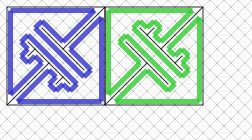

In [9]:
cols = 18
rows = 10
size = 14
display = Display(cols * size, rows * size)

test_pat = np.concatenate([
    np.array(list(kells1(False))),
    np.array(list(kells1(True))) + np.array([7, 0, 7, 0])
]) * size

with display as context:
    context.set_line_width(0.5)
    context.set_source_rgba(0, 0, 0, 0.25)
    draw_simple_lines(context, diamond_grid(cols, rows, size))
    context.set_source_rgba(0, 0, 0, 0.08)
    draw_simple_lines(context, square_grid(cols*2, rows*2, size/2))
    
    context.set_line_width(1)
    context.set_source_rgba(0, 0, 0, 0.8)

    draw_simple_lines(context, test_pat)

    width = 5
    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.2, 0.8, 0.8)
    pf = PathFind(np.array([0.75,0.75]) * size, (1,0), test_pat, size)
    for i in range(20):
        draw_simple_lines(context, list(pf.step()))

    context.set_line_width(width)
    context.set_source_rgba(0.2, 0.8, 0.2, 0.8)
    pf = PathFind(np.array([7.75,0.75]) * size, (1,0), test_pat, size)
    for i in range(20):
        draw_simple_lines(context, list(pf.step()))
    
display.show()